## Korelace

- **Korelace** analyzuje vztah mezi dvěma nebo více proměnnými a hodnotí sílu tohoto vztahu. Korelace ukazuje, jak moc se proměnné pohybují společně, ale neznamená, že jedna proměnná způsobuje změnu druhé (korelace není kauzalita).
- Existují i tzv. **falešné korelace**, kde vysoká korelace je způsobena náhodou nebo skrytou proměnnou, která ovlivňuje obě analyzované proměnné.
- Síla vztahu je vyjádřena pomocí **korelačního koeficientu**. Hodnoty tohoto koeficientu se pohybují od -1 (perfektní negativní korelace) až po 1 (perfektní pozitivní korelace).
- Hodnota 0 znamená, že mezi proměnnými není žádná lineární korelace.

### Metody pro výpočet korelace v pandas

- Pomocí metody `corr()` lze zobrazit **korelační matici** mezi číselnými sloupci v **DataFrame**. Viz [corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html).
- Metoda `corr()` použitá na jeden sloupec může vypočítat **korelační koeficient** mezi dvěma sloupci.
- Pomocí metody `corrwith()` lze spočítat korelaci mezi řádky či sloupci dvou různých **DataFrame** objektů. Viz [corrwith()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html).
- Korelační diagram lze vizualizovat pomocí metody `plot.scatter()`, která zobrazuje body ve dvourozměrném prostoru. Viz [plot.scatter()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html).
- **DataFrame** může být použit jako vstupní argument pro vizualizace v knihovně **Seaborn**.

### Typy vztahů
- **Lineární vztah**: Jedna proměnná se mění přímo úměrně s druhou proměnnou.
- **Monotónní vztah**: Jedna proměnná roste nebo klesá s druhou proměnnou, ale ne nutně konstantní rychlostí.

### Měření linearity
- Pomocí **scatter plotu** (bodového grafu), který vizuálně znázorňuje vztah mezi dvěma proměnnými.

## Korelace

### Pearsonův korelační koeficient
- **Pearsonův korelační koeficient** měří **lineární vztah** mezi dvěma spojitými proměnnými.
- Korelační síla se často vyjadřuje pomocí **koeficientu determinace**, což je čtverec Pearsonova koeficientu.

**Vzorec koeficientu determinace**

$$
R^2 = r^2
$$

$$
\begin{align*}
R^2 &: \text{Koeficient determinace} \\
r &: \text{Pearsonův korelační koeficient mezi dvěma proměnnými}
\end{align*}
$$

**Vzorec Pearsonova korelačního koeficientu:**

$$
r = \frac{\sum_{i=1}^{n} (X_i - \overline{X})(Y_i - \overline{Y})}
{\sqrt{\sum_{i=1}^{n} (X_i - \overline{X})^2 \sum_{i=1}^{n} (Y_i - \overline{Y})^2}}
$$

$$
\begin{align*}
r &: \text{Pearsonův korelační koeficient} \\
X_i &: \text{Hodnoty proměnné } X \text{ pro každé } i \\
Y_i &: \text{Hodnoty proměnné } Y \text{ pro každé } i \\
\overline{X} &: \text{Průměr hodnot proměnné } X \\
\overline{Y} &: \text{Průměr hodnot proměnné } Y \\
n &: \text{Počet pozorování}
\end{align*}
$$

### Spearmanův korelační koeficient
- **Spearmanův korelační koeficient** měří sílu nelineárního vztahu mezi proměnnými a je vhodný pro práci s ordinálními daty nebo s daty, která nejsou normálně distribuována.
- Používá se při hodnocení monotónních vztahů.

**Vzorec Spearmanova korelačního koeficientu:**

$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$

$$
\begin{align*}
\rho &: \text{Spearmanův pořadový korelační koeficient} \\
d_i &: \text{Rozdíl mezi pořadími jednotlivých párů hodnot} \\
n &: \text{Počet pozorování}
\end{align*}
$$

### Kendalův tau koeficient
- **Kendalův tau koeficient** měří sílu vztahu mezi proměnnými na základě jejich pořadí.
- Je odolnější vůči malým datovým vzorkům a extrémním hodnotám než Spearmanův koeficient.

**Vzorec Kendalova tau koeficientu:**

$$
\tau = \frac{2}{n(n-1)} \sum_{i<j} \text{sign}(x_i - x_j) \cdot \text{sign}(y_i - y_j)
$$

$$
\begin{align*}
\tau &: \text{Kendallův tau koeficient} \\
x_i, y_i &: \text{Hodnoty proměnných } X \text{ a } Y \text{ pro každé } i \\
\text{sign} &: \text{Signum funkce, která určuje znaménko rozdílu} \\
n &: \text{Počet pozorování}
\end{align*}
$$


<Axes: xlabel='TMAX', ylabel='PRCP'>

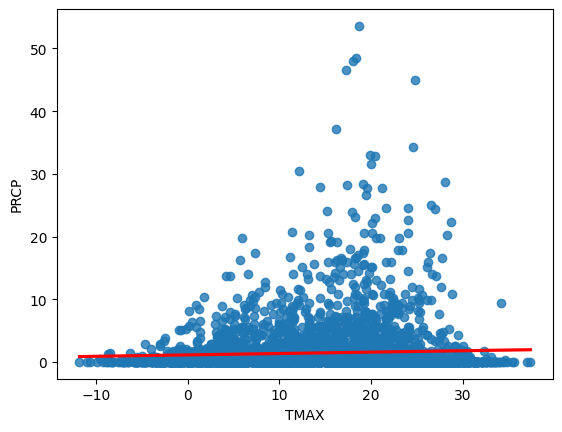

In [1]:
# Vizualizace korelace mezi dvěma proměnnými
import pandas as pd
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv', sep=';')
df = df[(df['NAME']=='RUZYNE')]
df = df.dropna(subset=['PRCP','TMAX'])

# Přidáme do grafu přímku regrese

sns.regplot(x='TMAX', y='PRCP', data=df, line_kws={'color':'red'})



In [3]:
df[['TMAX','TMIN']].corr()

TMAX      TMIN
TMAX  1.000000  0.897598
TMIN  0.897598  1.000000

In [3]:
import pandas as pd

from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import kendalltau

df = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv', sep=';')
df = df[(df['NAME']=='RUZYNE')]
df = df.dropna(subset=['PRCP','TMAX'])

# Výpočet Pearsonovy korelace
pearson_corr_tmax, p_value_tmax_pearson = pearsonr(df['TMAX'], df['PRCP'])
# Výpočet Spearmanovy korelace
spearman_corr, p_value = spearmanr(df['TMAX'], df['PRCP'])

# Výpočet Kendallovy korelace
kendall_corr, p_value = kendalltau(df['TMAX'], df['PRCP'])

print('Pearsonova korelace: ', pearson_corr_tmax)
print('Spearmanova korelace: ', spearman_corr)
print('Kendallova korelace: ', kendall_corr)

Pearsonova korelace:  0.053256223286683856
Spearmanova korelace:  -0.06277687269985281
Kendallova korelace:  -0.04398000540543963


In [ ]:
# Vypocet korelacniho koefecientu mezi dvemi sloupci za pomoci vychozi, tj. Pearsonovy metody
df[ 'TMAX'].corr(df['TMIN'])

In [ ]:
# Zobrazeni korelacni matice
df[['PRCP','SNWD','TAVG','TMAX','TMIN']].corr()

In [ ]:
import seaborn as sns
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv', sep=';')
df = df[(df['NAME']=='RUZYNE')]
df =df[['TMAX','PRCP','TMIN']]


mask = np.triu(np.ones_like(df.corr('kendall')))
dataplot = sns.heatmap(df.corr('kendall'), cmap="YlGnBu", annot=True, mask=mask)

### Cvičení 1 zadání
1. Z dat dostupných pod touto URL vytvořte DataFrame s názvem `df`: ['https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'](https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv)
2. Agregujte `df` dle sloupce `NAME`, agregovanými sloupci jsou `TMAX` a `TMIN`, u obou hledáme průměr.
3. Vytvořte si dataframe `df_tmax`, kde budou `NAME` seřazeny dle průměru `TMAX` sestupně.
4. Vytvořte si dataframe `df_tmin`, kde budou `NAME` seřazeny dle průměru `TMIN` sestupně.
5. Za pomoci `scipy.stats.kendalltau` spočítejte korelaci mezi dataframe z bodu 3 a 4.


In [6]:
import pandas as pd
from scipy.stats import kendalltau
#1
df = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv', sep=';')
#2
df = df.groupby('NAME',as_index=False).agg({'TMAX':'mean','TMIN':'mean'})
#3
df_tmax = df[['NAME','TMAX']].sort_values('TMAX',ascending=False)
#4
df_tmin = df[['NAME','TMIN']].sort_values('TMIN',ascending=False)
#5
corr_c,p_value = kendalltau(df_tmax['TMAX'],df_tmin['TMIN'])
print(corr_c)

0.9999999999999999


## Cvičení 2 zadání

1. Z dat dostupných pod touto URL vytvořte DataFrame s názvem `df`: ['https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'](https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv)
2. Upravte datový typ sloupce `DATE` na `datetime`.
3. Přidejte do `df` sloupce `YEAR` a `MONTH`.
4. Agregujte `df` dle `MONTH` a `YEAR` na indexu a `NAME` ve sloupcích, agregovaná hodnota je `PRCP`, funkce `mean`.
5. Za pomoci Pearsonova korelačního koeficientu z `scipy.stats.pearsonr()` spočítejte korelační koeficient mezi `PRCP` v `NAME == 'RUZYNE'` a `NAME == 'KOSICE'`.




In [8]:
import pandas as pd
from scipy.stats import pearsonr
df = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv', sep=';')
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month

df =  df.pivot_table(index=['MONTH','YEAR'],columns='NAME',values='PRCP',aggfunc='mean')
df_ruzyne = df['RUZYNE']
df_kosice = df['KOSICE']

corr_c,p_value = pearsonr(df_ruzyne,df_kosice)
print(corr_c,p_value)


0.06692299338170252 0.29089887743380327
